# Remove some observations

We choose to remove the observations that are pedestrians or bicycle. We also remove the observations with less than $200$ or more than $800$ measurements points.

In [1]:
# Load packages
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.mixture import GaussianMixture

RECORDING_NUMBER = '00'

In [2]:
# Load data
tracks = pd.read_pickle(f'./data/processed/recording_{RECORDING_NUMBER}/tracks.pkl')
info = pd.read_pickle(f'./data/processed/recording_{RECORDING_NUMBER}/info.pkl')
meta = pd.read_pickle(f'./data/processed/recording_{RECORDING_NUMBER}/meta.pkl')

In [3]:
print(f'There are {len(tracks)} observations in the dataset.')

There are 348 observations in the dataset.


### Get only observations that correspond to vehicle

In [4]:
# all_vehicles = ['bicycle', 'bus', 'car', 'motorcycle', 'pedestrian', 'trailer', 'truck', 'van']
vehicles = ['bus', 'car', 'motorcycle', 'trailer', 'truck', 'van']

vehicle_track_id = []
for track in info.values():
    if track['class'] in vehicles:
        vehicle_track_id.append(track['trackId'])

In [5]:
tracks_vehicle = []
for track in tracks:
    if track['trackId'] in vehicle_track_id:
        tracks_vehicle.append(track)

### Get the length of each observations

In [6]:
print(f'There are {len(tracks_vehicle)} observations in the dataset with vehicles.')

There are 328 observations in the dataset with vehicles.


In [7]:
tracks_len = np.array([len(track['xVelocity']) for track in tracks_vehicle])

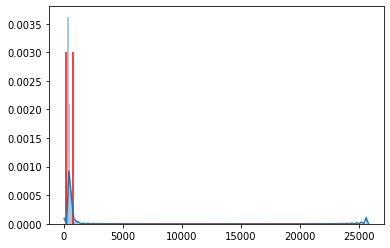

In [8]:
# Plot the density of the length
sns.distplot(tracks_len, bins = 200)
plt.vlines(200, ymin=0, ymax=0.003, colors='red')
plt.vlines(800, ymin=0, ymax=0.003, colors='red')
plt.show()

In [9]:
print(f'There are {np.sum(tracks_len < 200)} observations with less than 200 sampling points.')
print(f'There are {np.sum(tracks_len > 800)} observations with more than 800 sampling points.')

There are 4 observations with less than 200 sampling points.
There are 13 observations with more than 800 sampling points.


In [10]:
print(f'We remove these observations that corresponds to {np.round(100 * (np.sum(tracks_len < 200) + np.sum(tracks_len > 800)) / len(tracks_len), 1)}% of the data.')

We remove these observations that corresponds to 5.2% of the data.


In [11]:
idx = (tracks_len > 200) & (tracks_len < 800)

In [12]:
tracks_sub = [track for is_good, track in zip(idx, tracks_vehicle) if is_good]
tracks_sub_len = np.array([len(track['xVelocity']) for track in tracks_sub])

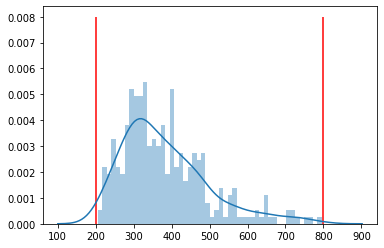

In [13]:
# Plot the density of the length
sns.distplot(tracks_sub_len, bins=50)
plt.vlines(200, ymin=0, ymax=0.008, colors='red')
plt.vlines(800, ymin=0, ymax=0.008, colors='red')
plt.show()

In [14]:
# Save the results
pd.to_pickle(tracks_sub, f'./data/processed/recording_{RECORDING_NUMBER}/tracks_sub.pkl')